In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, rmsprop
from keras.utils.np_utils import to_categorical
import cv2
import sys
import os

Using TensorFlow backend.


In [2]:
train_directory = "D:/Learning/USF - Data Science Programming/Project Final/images/"
test_directory = "D:/Learning/USF - Data Science Programming/Project Final/test/"
categories = ["withoutsign","withsign"]

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])        

In [5]:
create_trainval_data()

In [6]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_directory, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        

In [7]:
create_test_data()

In [8]:
import random
random.seed(42)
random.shuffle(trainval_data)

In [9]:
X = []
y = []

X_test = []
y_test = []

In [10]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)

In [11]:
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [12]:
len(X_test)

75

In [13]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(182, 64, 64, 3)
(182,)
(75, 64, 64, 3)
(75,)


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [16]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [17]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)

In [18]:
test_datagen.fit(X_test)

In [19]:
y_train_categorical = to_categorical(y_train, 2)
y_valid_categorical = to_categorical(y_valid, 2)
y_test_categorical = to_categorical(y_test, 2)

In [20]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [21]:
channels = 3
train_img_size = len(X_train)
batch_size = 32
validation_img_size = len(X_valid)

In [22]:
from keras.models import load_model

model = load_model('decentmodel.h5')
model.summary()

# model = Sequential()

# model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(64, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.375))
# model.add(Dense(2))
# model.add(Activation('sigmoid'))
          
# model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
# model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                802880    
_________________________________________________________________
activation_49 (Activation)   (None, 64)              

In [40]:
# history = model.fit_generator(train_datagen.flow(X_train, y_train_categorical),
#                               steps_per_epoch=train_img_size//batch_size,
#                               epochs=50,
#                               validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
#                               validation_steps=validation_img_size//batch_size)

Epoch 1/50
4/4 [==============================] - 1s 291ms/step - loss: 0.2195 - accuracy: 0.9646 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 116ms/step - loss: 0.1297 - accuracy: 0.9735 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 1s 142ms/step - loss: 0.0898 - accuracy: 0.9766 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 117ms/step - loss: 0.0910 - accuracy: 0.9690 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 1s 132ms/step - loss: 0.1115 - accuracy: 0.9558 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 124ms/step - loss: 0.1497 - accuracy: 0.9558 - val_loss: 9.8856e-04 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 125ms/step - loss: 0.1269 - accuracy: 0.9469 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 8/50
4/4 [

In [42]:
# plt.plot(model.history['accuracy'])
# plt.plot(model.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

In [220]:
model.save('decentmodel.h5')

In [23]:
print(model.metrics_names)

['loss', 'accuracy']


In [25]:
score = model.evaluate(X_test, y_test_categorical)

75/75 [==============================] - 0s 4ms/step


In [26]:
score

[23.891287434895833, 0.9599999785423279]

In [27]:
print('Images without sign are labeled as class ', categories.index('withoutsign'))
print('Images with sign are labeled as class ', categories.index('withsign'))

Images without sign are labeled as class  0
Images with sign are labeled as class  1


The random image label is  8


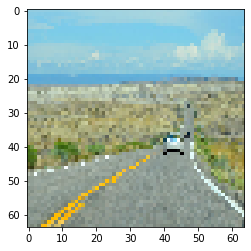

Predicted Class [0]


In [39]:
random_img = random.randint(0,74)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Class ' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

In [29]:
results = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(results_class, y_test)

array([[31,  0],
       [ 3, 41]], dtype=int64)

In [31]:
results_class = np.argmax(results, axis=1, out=None)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.93      0.96        44

    accuracy                           0.96        75
   macro avg       0.96      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75

